<a href="https://colab.research.google.com/github/1rubenito/data_science/blob/main/An%C3%A1lise_COVID19_Mundo_e_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Análise de dados COVID-19 no Brasil
### Do primeiro caso à primeira aplicação da vacina

*por* `Rubens Gianfaldoni`

---
  


<img alt="covid19" width="38%" src="https://www.acessa.com/saude/arquivo/noticias/2021/02/03-juiz-fora-tem-mais-quatro-mortes-205-novos-casos-covid-19/foto.jpg">


A COVID-19 é uma doença causada pelo coronavírus, denominado SARS-CoV-2. Os sintomas podem variar de infecções assintomáticas a quadros graves.
Aproximadamente 20% dos casos positivos precisam de atendimento hospitalar, os outros 80% dos casos podem ser assintomáticos ou com poucos sintomas.
No Brasil, o [primeiro caso](https://bit.ly/2ZRjD2L) identificado aconteceu em 26 de fevereiro de 2020. Um cidadão que havia retornado de uma viagem da Itália.
Em 17 de março ocorre a [primeira morte](https://bit.ly/3swuQ4Z) em decorrência do vírus, na cidade de São Paulo.

# Origem dos dados

Os dados para esse `dataset` foram extraídos do site [Our World in Data](https://ourworldindata.org/coronavirus).
Existem muitas variáveis no `dataset` que explicam porque alguns países estão avançando no combate ao [vírus](https://bit.ly/3uCRjPR) e outros estão com casos muito acima dos demais.

*No Brasil alguns problemas com a atualização dos dados comprometem a avaliação e o entendimento dos gráficos. Por exemplo, alguns estados não atualizam seus dados aos fins de semana, o que acarreta que todo montante de dados do fim de semana, acabe entrando na próxima segunda-feira. Isso significa que em alguns estados o primeiro dia útil da semana sempre estará com casos divergentes dos demais dias da semana, tornando assim a avaliação com erros pontuais de crescimento de casos.*

---
---

#### O `dataset` contém muitas variáveis. Traduzi todas para melhor entendimento. Usaremos algumas durante a análise.

---
* iso_code  | `sigla usada para identificar os países`
* continent | `continente do país`
* location  | `localização geográfica do país`
* data      | `data de captação dos dados`
* total_cases | `total de casos confirmados`
* new_cases | `novos casos confirmados`
* new_cases_smoothed | `resumo dos últimos 7 dias de novos casos`
* total_deaths | `total de mortes`
* new_deaths | `novo número de mortos`
* new_deaths_smoothed | `resumo dos últimos 7 dias de novas mortes`
* total_cases_per_million | `casos totais por milhão de habitante`
* new_cases_per_million | `novos casos por milhão de habitante`
* new_cases_smoothed_per_million | `resumo dos últimos 7 dias de novos casos por milhão de habitante`
* total_deaths_per_million | `total de mortes por milhão de habitante`
* new_deaths_per_million | `novas mortes por milhão de habitante`
* new_deaths_smoothed_per_million | `resumo dos últimos 7 dias de novas mortes por milhão de habitante`
* reproduction_rate | `taxa de reprodução em tempo-real do vírus`
* icu_patients | `taxa de pacientes em UTI, por dia`
* icu_patiens_per_milion | `taxa de pacientes em UTI, por dia, por milhão de habitante`
* hosp_patients | `taxa de ocupação de hospitais, por dia`
* hosp_patients_per_milion | `taxa de ocupação de hospitais, por dia, por milhão de habitante`
* weekly_icu_admissions | `número de pacientes enviados para UTI, por semana`
* weekly_icu_admissions_per_milion | `número de pacientes enviados para UTI por semana, por milhão de habitante`
* weekly_hosp_admissions | `número de pacientes enviados para hospitais, por semana`
* weekly_hosp_admissions_per_milion | `número de pacientes enviados para hospitais, por semana, por milhão de habitante`
* total_tests | `testes realizados`
* new_tests | `novos testes, acumulados de dias`
* total_tests_per_thousand | `total de testes para cada mil pessoas`
* new_tests_per_thousand | `novos testes para cada mil pessoas`
* new_tests_smoothed | `resumo dos últimos 7 dias de novos testes`
* new_tests_smoothed_per_thousand | `resumo dos últimos 7 dias de novos testes,a cada mil pessoas`
* positive_rate | `resultado de testes positivos na média de 7 dias`
* tests_per_case | `quantos testes foram realizados para cada caso positivo do vírus`
* tests_units | `localização de onde vem os resultados dos testes`
* total_vaccinations | `total de doses da vacina`
* people_vaccinated | `total de pessoas vacinadas`
* people_fully_vaccinated | `total de pessoas que tomara todas as doses`
* new_vaccinations | `novas doses de vacinas recebidas`
* new_vaccinations_smoothed | `resumo de 7 dias de novas doses de vacinas recebidas` 
* total_vaccinations_per_hundred | `total de vacinas recebidas para cada 100 pessoas`
* people_vaccinated_per_hundred | `pessoas vacinadas para cada 100 pessoas`
* people_fully_vaccinated_per_hundred | `pessoas que receberam todas as doses da vacina para cada 100 pessoas`
* new_vaccinations_smoothed_per_milion | `resumo de 7 dias de novas doses recebidas, para cada milhão de habitante`
* stringency_index | `índice de isolamento`
* population | `população`
* population_density | `densidade demográfica`
* median_age | `média de idade`
* aged_65_older | `população com mais de 65 anos de idade`
* aged_70_older | `população com mais de 70 anos de idade`
* gdp_per_capita | `produto interno bruto(PIB)`
* extreme_poverty | `população que vive em caso de extrema pobreza`
* cardiovasc_death_rate | `taxa de mortalidade por doenças cardiovasculares`
* diabetes_prevalence | `total de diabéticos em uma população entre 20 e 79 anos`
* female_smokers | `fumantes do sexo feminino`
* male_smokers | `fumantes do sexo masculino`
* handwashing_facilities | `parcela da população com acesso à higienização básica das mãos`
* hospital_beds_per_thousand | `taxa de leitos em hospitais para cada mil pessoas`
* life_expectancy | `espectativa de vida ao nascer em 2019`
* human_development_index | `índice de desenvolvimento humano`
---
---
---


#Importando os dados

Vamos começar importando as bibliotecas necessárias para essa análise.
Usaremos esta [base de dados](https://covid.ourworldindata.org/data/owid-covid-data.csv).

In [2]:
# importar as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#visualização dos plots
%matplotlib inline

In [3]:
#criar uma variável para o dataset
DATA_PATH = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df = pd.read_csv(DATA_PATH)

In [4]:
#mostrar as 7 primeiras linhas
df.head(7)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,0.026,0.000,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,0.026,0.000,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511



As 7 primeiras linhas do `dataset` nos mostram a quantidade de variáveis e suas características. Dessa maneira podemos começar um filtro do que usaremos a seguir.

In [5]:
# mostrar últimas linhas
df.tail(7)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
83439,ZWE,Africa,Zimbabwe,2021-04-16,37534.0,112.0,55.286,1551.0,1.0,2.286,2525.344,7.536,3.720,104.354,0.067,0.154,1.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,467104.0,31.427,0.136,1942.0,0.131,0.028,35.1,tests performed,304701.0,269732.0,34969.0,18820.0,14071.0,2.05,1.81,0.24,947.0,57.41,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
83440,ZWE,Africa,Zimbabwe,2021-04-17,37699.0,165.0,60.857,1552.0,1.0,2.000,2536.445,11.101,4.095,104.421,0.067,0.135,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2311.0,469415.0,31.583,0.155,1962.0,0.132,0.031,32.2,tests performed,311901.0,276095.0,35806.0,7200.0,12738.0,2.10,1.86,0.24,857.0,57.41,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
83441,ZWE,Africa,Zimbabwe,2021-04-18,37751.0,52.0,66.143,1553.0,1.0,2.143,2539.944,3.499,4.450,104.488,0.067,0.144,1.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1111.0,470526.0,31.658,0.075,1941.0,0.131,0.034,29.3,tests performed,314446.0,278583.0,35863.0,2545.0,12993.0,2.12,1.87,0.24,874.0,57.41,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
83442,ZWE,Africa,Zimbabwe,2021-04-19,37859.0,108.0,78.857,1553.0,0.0,1.571,2547.210,7.266,5.306,104.488,0.000,0.106,1.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1863.0,472389.0,31.783,0.125,2049.0,0.138,0.038,26.0,tests performed,316991.0,280568.0,36423.0,2545.0,11773.0,2.13,1.89,0.25,792.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
83443,ZWE,Africa,Zimbabwe,2021-04-20,37875.0,16.0,77.857,1554.0,1.0,1.571,2548.287,1.077,5.238,104.555,0.067,0.106,1.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2493.0,474882.0,31.951,0.168,2126.0,0.143,0.037,27.3,tests performed,325007.0,288229.0,36778.0,8016.0,10950.0,2.19,1.94,0.25,737.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
83444,ZWE,Africa,Zimbabwe,2021-04-21,37980.0,105.0,87.286,1555.0,1.0,1.000,2555.351,7.065,5.873,104.623,0.067,0.067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1930.0,476812.0,32.081,0.130,2063.0,0.139,0.042,23.6,tests performed,332996.0,295631.0,37365.0,7989.0,10124.0,2.24,1.99,0.25,681.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
83445,ZWE,Africa,Zimbabwe,2021-04-22,38018.0,38.0,85.143,1555.0,0.0,0.714,2557.908,2.557,5.729,104.623,0.000,0.048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1945.0,478757.0,32.211,0.131,1953.0,0.131,NaN,NaN,tests performed,351799.0,308071.0,43728.0,18803.0,9417.0,2.37,2.07,0.29,634.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [6]:
# identificando o tipo da coluna date
df['date'].dtypes

dtype('O')

In [7]:
# convertendo a coluna date de String para datetime
df['date'] = pd.to_datetime(df['date'])

In [8]:
# exibir número de colunas e linhas
print("Linhas: {}".format(df.shape[0]))
print("Colunas: {}\n".format(df.shape[1]))

#  exibir tipos no dataset
display(df.dtypes)

Linhas: 83446
Colunas: 59



iso_code                                         object
continent                                        object
location                                         object
date                                     datetime64[ns]
total_cases                                     float64
new_cases                                       float64
new_cases_smoothed                              float64
total_deaths                                    float64
new_deaths                                      float64
new_deaths_smoothed                             float64
total_cases_per_million                         float64
new_cases_per_million                           float64
new_cases_smoothed_per_million                  float64
total_deaths_per_million                        float64
new_deaths_per_million                          float64
new_deaths_smoothed_per_million                 float64
reproduction_rate                               float64
icu_patients                                    

In [9]:
# exibir mais detalhes do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83446 entries, 0 to 83445
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   iso_code                               83446 non-null  object        
 1   continent                              79407 non-null  object        
 2   location                               83446 non-null  object        
 3   date                                   83446 non-null  datetime64[ns]
 4   total_cases                            81480 non-null  float64       
 5   new_cases                              81478 non-null  float64       
 6   new_cases_smoothed                     80477 non-null  float64       
 7   total_deaths                           71880 non-null  float64       
 8   new_deaths                             72038 non-null  float64       
 9   new_deaths_smoothed                    80477 non-null  float6

In [10]:
# quantidade de dados ausentes do dataset
df.isnull().sum().sort_values(ascending=False)

weekly_icu_admissions                    82672
weekly_icu_admissions_per_million        82672
weekly_hosp_admissions                   82173
weekly_hosp_admissions_per_million       82173
people_fully_vaccinated                  77827
people_fully_vaccinated_per_hundred      77827
new_vaccinations                         76327
people_vaccinated                        75705
people_vaccinated_per_hundred            75705
total_vaccinations                       75026
total_vaccinations_per_hundred           75026
icu_patients_per_million                 74691
icu_patients                             74691
hosp_patients                            72877
hosp_patients_per_million                72877
new_vaccinations_smoothed_per_million    69854
new_vaccinations_smoothed                69854
total_tests                              45510
total_tests_per_thousand                 45510
new_tests_per_thousand                   45224
new_tests                                45224
handwashing_f

In [11]:
# exibir dados ausentes em porcentagem
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

weekly_icu_admissions                    0.990725
weekly_icu_admissions_per_million        0.990725
weekly_hosp_admissions                   0.984745
weekly_hosp_admissions_per_million       0.984745
people_fully_vaccinated                  0.932663
people_fully_vaccinated_per_hundred      0.932663
new_vaccinations                         0.914687
people_vaccinated                        0.907233
people_vaccinated_per_hundred            0.907233
total_vaccinations                       0.899096
total_vaccinations_per_hundred           0.899096
icu_patients_per_million                 0.895082
icu_patients                             0.895082
hosp_patients                            0.873343
hosp_patients_per_million                0.873343
new_vaccinations_smoothed_per_million    0.837116
new_vaccinations_smoothed                0.837116
total_tests                              0.545383
total_tests_per_thousand                 0.545383
new_tests_per_thousand                   0.541955


In [12]:
# exibir quais variáveis estão acima de 90% de dados ausentes
((df.isnull().sum() / df.shape[0]) > 0.90).sort_values(ascending=False)

weekly_hosp_admissions_per_million        True
weekly_hosp_admissions                    True
weekly_icu_admissions_per_million         True
weekly_icu_admissions                     True
people_vaccinated                         True
people_fully_vaccinated                   True
new_vaccinations                          True
people_vaccinated_per_hundred             True
people_fully_vaccinated_per_hundred       True
human_development_index                  False
total_tests                              False
hosp_patients_per_million                False
hosp_patients                            False
icu_patients_per_million                 False
icu_patients                             False
reproduction_rate                        False
new_deaths_smoothed_per_million          False
new_deaths_per_million                   False
total_deaths_per_million                 False
new_cases_smoothed_per_million           False
new_cases_per_million                    False
total_cases_p

Verificando a quantidade de dados ausentes podemos analisar:


*   11 colunas do `dataset` tem mais de 90% de dados ausentes;
*   somente `date`, `location`, `iso`, tem 100% de dados preenchidos;
*   4 variáveis possuem mais de 98% de dados ausentes : `weekly_icu_admissions`, `weekly_icu_admissions_per_million`,      `weekly_hosp_admissions`,`weekly_hosp_admissions_per_million`, iremos removê-las.
 



In [13]:
# remover colunas com 98% ou mais de dados ausentes
df.drop(columns=['weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million'], inplace=True)

# Análise dos dados

In [14]:
# criar nova variável
df_covid = df.copy()

In [15]:
# exibir dados da variável continent
df_covid.continent.unique()

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

Nesse momento, não nos interessa a coluna `continent` e também os continentes contidos na coluna `location`, então vamos retirar do `dataset`:


*   coluna `continent`
*   variáveis : `South America`, `European Union`, `North America`, `Europe`, `Asia`, `Oceania`



In [16]:
# remover coluna continent
df_covid.drop(columns=['continent'], inplace=True)

In [17]:
# remover North America
remove_north = df_covid[df_covid['location'] == 'North America'].index
df_covid = df_covid.drop(remove_north)

In [18]:
# remover Oceania
remove_ocean = df_covid[df_covid['location'] == 'Oceania'].index
df_covid = df_covid.drop(remove_ocean)

In [19]:
# remover Europe
remove_europe = df_covid[df_covid['location'] == 'Europe'].index
df_covid = df_covid.drop(remove_europe)

In [20]:
# remover Africa
remove_africa = df_covid[df_covid['location'] == 'Africa'].index
df_covid = df_covid.drop(remove_africa)

In [21]:
# remover European Union
remove_euro_u = df_covid[df_covid['location'] == 'European Union'].index
df_covid = df_covid.drop(remove_euro_u)

In [22]:
# remover Asia
remove_asia = df_covid[df_covid['location'] == 'Asia'].index
df_covid = df_covid.drop(remove_asia)

In [23]:
# remover South America
remove_south = df_covid[df_covid['location'] == 'South America'].index
df_covid = df_covid.drop(remove_south)

In [24]:
# dataset sem os continentes na variável location
df_covid.location.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'G

## Brasil e a ascensão da COVID19

No Brasil, o primeiro caso identificado aconteceu em 26 de fevereiro de 2020. Um cidadão que havia retornado de uma viagem da Itália.



In [25]:
# criar nova variável para analisar Brasil
br_covid = df_covid.copy()

In [40]:
# exibir como estava o Brasil em 26-02-2020
br_covid.loc[(br_covid['date'] == '2020-02-26') & (br_covid['location'] == 'Brazil')]

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
10699,BRA,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


Vamos verificar como estavam os casos no mundo nessa mesma data.

In [27]:
# exibir total_cases das primeiras 10 posições do dataset para data 26-02-2020 
br_covid.loc[br_covid['date'] == '2020-02-26', ['date', 'location', 'total_cases']].sort_values(by='total_cases', ascending=False)[:10]

,date,location,total_cases
81846,2020-02-26,World,81376.0
15837,2020-02-26,China,78166.0
69790,2020-02-26,South Korea,1261.0
35194,2020-02-26,International,705.0
37434,2020-02-26,Italy,453.0
38299,2020-02-26,Japan,192.0
35623,2020-02-26,Iran,139.0
67010,2020-02-26,Singapore,93.0
74850,2020-02-26,Thailand,40.0
78684,2020-02-26,United Kingdom,37.0


Podemos ver acima que o país na época com mais casos era a `China` com `78.166`. Na época era o epicentro da pandemia, pois foram onde apareceram os [primeiros casos no mundo](https://bit.ly/31IpTe9).

Um pouco menos de 1 mês depois do primeiro caso confirmado no Brasil aconteceu a primeira morte pelo vírus em *17 de março de 2020*. Vamos analisar como estavam os números de mortes em relação aos 10 primeiros no mundo nesta mesma data.

In [28]:
# exibir os 10 países com mais mortes em 17-03-2020
br_covid.loc[br_covid['date'] == '2020-03-17', ['date', 'location', 'total_deaths']].sort_values(by='total_deaths', ascending=False)[:10]

,date,location,total_deaths
81866,2020-03-17,World,7966.0
15857,2020-03-17,China,3230.0
37454,2020-03-17,Italy,2503.0
35643,2020-03-17,Iran,988.0
70640,2020-03-17,Spain,533.0
27313,2020-03-17,France,149.0
79161,2020-03-17,United States,134.0
78704,2020-03-17,United Kingdom,83.0
69810,2020-03-17,South Korea,81.0
52867,2020-03-17,Netherlands,43.0


Na mesma data da primeira morte pelo vírus no Brasil, como visto na coluna `total_deaths`, assim estavam os 5 maiores países com mortes:

1. China - *3.230*
2. Itália - *2.503*
3. Irã - *988*
4. Espanha - *533*
5. França - *149*



Abaixo os números da variável `total_deaths` dos 5 países plotado em um gráfico de barras:

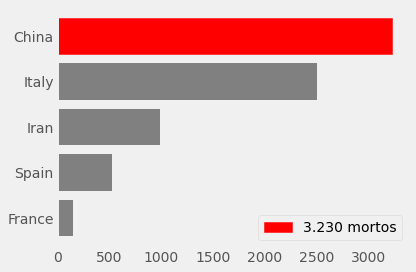

In [81]:
#plot de países com maiores número de mortos em 17-03-2020
plt.style.use('fivethirtyeight')
total5 = br_covid.loc[br_covid['date'] == '2020-03-17',
                      ['location', 'total_deaths']].sort_values(by='total_deaths', ascending=False)[1:6]

fig, ax = plt.subplots()

cor_5 = ax.barh('location', 'total_deaths', data=total5, color='grey', label='3.230 mortos')
cor_5[0].set_color('r')

ax.grid(False)
ax.invert_yaxis()

plt.legend()
plt.tight_layout()

# Vacinação no Brasil

Em 17 de janeiro de 2021, o Brasil aplicou a primeira vacina. Aprovada pela Anvisa, a Coronavac foi aplica em [Mônica Calazans](https://bit.ly/3e2g4z3) no Hospital das Clínicas. 

Vamos analisar qual a situação do Brasil, quase um ano após o primeiro caso.

In [30]:
# exibir o Brasil em 17-01-2021, somente variáveis date, location, total_cases, new_cases, total_deaths
br_covid.loc[(br_covid['date'] == '2021-01-17') & (br_covid['location'] == 'Brazil'),
             ['date', 'location', 'total_cases', 'new_cases', 'total_deaths']]

,date,location,total_cases,new_cases,total_deaths
11025,2021-01-17,Brazil,8488099.0,33040.0,209847.0


Vamos comparar, qual era o país com mais pessoas vacinadas no dia que o Brasil aplicada sua primeira dose:

In [51]:
# os 10 primeiros países com mais vacinas aplicadas em 17-01-2021
br_covid.loc[br_covid['date'] == '2021-01-17', 
             ['date', 'location', 'people_vaccinated']].sort_values(by='people_vaccinated', ascending=False)[:10]

,date,location,people_vaccinated
82172,2021-01-17,World,25696765.0
79010,2021-01-17,United Kingdom,4062501.0
37312,2021-01-17,Israel,2205764.0
37760,2021-01-17,Italy,1212561.0
29300,2021-01-17,Germany,1203651.0
13961,2021-01-17,Canada,550438.0
60483,2021-01-17,Poland,468795.0
48862,2021-01-17,Mexico,468708.0
27619,2021-01-17,France,391910.0
34662,2021-01-17,India,224301.0


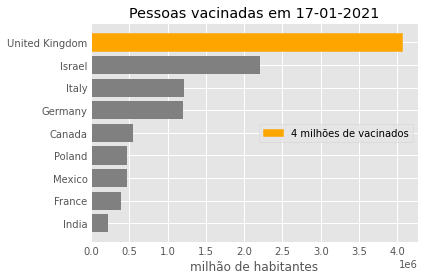

In [75]:
#plot bar exibindo pessoas vacinadas em 17-01-2021, sem variável World
w_vacina = df_covid.loc[df['date'] == '2021-01-17', 
                        ['location', 'people_vaccinated']].sort_values(by='people_vaccinated', ascending=False)[1:10]

fig, ax = plt.subplots()
plt.style.use('ggplot')

barlist = ax.barh('location', 'people_vaccinated', data=w_vacina, color='grey', label='4 milhões de vacinados')
barlist[0].set_color('orange')

plt.title('Pessoas vacinadas em 17-01-2021')
plt.xlabel('milhão de habitantes')
ax.invert_yaxis()

plt.legend(loc='center right')
plt.tight_layout()

In [33]:
# exibir variável World em 17-01-2021
br_covid.loc[(br_covid['date'] == '2021-01-17') & (br_covid['location'] == 'World'), ['date', 'location', 'people_vaccinated']]

,date,location,people_vaccinated
82172,2021-01-17,World,25696765.0


Como visto acima, o `Reino Unido` era a nação com mais pessoas vacinadas, passando de 4 milhões de habitantes vacinados. 

No mundo eram mais de 25 milhões de pessoas vacinadas.

In [34]:
# Brasil em 17-01-2021 em relação a pessoas vacinadas
br_covid.loc[(br_covid['date'] == '2021-01-17') & (br_covid['location'] == 'Brazil'), 
                         ['date','location','people_vaccinated']].sort_values(by='people_vaccinated')

,date,location,people_vaccinated
11025,2021-01-17,Brazil,112.0


In [35]:
# status do último dia do dataset para variável Brazil
br_covid.loc[(br_covid['date'] == '2021-04-16') & (br_covid['location'] == 'Brazil'),
             ['location', 'date', 'total_cases', 'total_deaths', 'new_deaths']]

,location,date,total_cases,total_deaths,new_deaths
11114,Brazil,2021-04-16,13832455.0,368749.0,3305.0


Podemos correlacionar o número alto de mortes ao baixo índice do PIB, como visto abaixo em um gráfico do tipo *dispersão*:

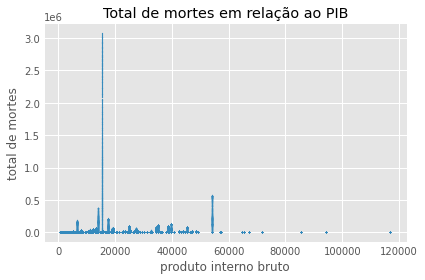

In [36]:
# plot de gráfico de dispersão com as variáveis gdp_per_capita e total_deaths
fig, ax = plt.subplots()

df.plot.scatter(x ='gdp_per_capita', y='total_deaths', ax=ax, s=0.6)
ax.set_title('Total de mortes em relação ao PIB')
ax.set_xlabel('produto interno bruto')
ax.set_ylabel('total de mortes')

plt.tight_layout()

## Conclusão

Neste `dateset` foi apresentado, além de dados totais da [pandemia da COVID19]((https://bit.ly/3uCRjPR) pelo mundo, alguns detalhes importantes sobre como foi o comportamento do vírus no Brasil, do primeiro dia até a primeira aplicação da vacina.
Desde o primeiro caso, até os momentos atuais, o país vem sofrendo duros golpes com cada vez mais casos, mais mortes, mais origens de cepas locais e desrespeito quanto as orientações de isolamento social.





Pontos importantes apareceram na análise como:

*   o Brasil durante os primeiros meses de pandemia, não foi atacado pelo vírus, ferozmente como os países da Ásia, Europa e América do Norte.


*   o Brasil demorou muito, em relação aos países com o mesmo número de tempo com vírus, para começar a vacinação, visto na análise que, enquanto o Brasil aplicava a primeira dose, países como : **Israel, Itália e Alemanha**, já passavam de `1 milhão` de pessoas vacinadas. O **Reino Unido** com `4 milhões` de pessoas vacinadas.Esses países se beneficiaram muito de terem começado antes a vacinar, puderam diminuir o isolamento e as pessoas retomarem ‘o novo normal’ com mais rapidez.


* países com menor poderio de riqueza sofrem muito com mais mortes. E concluímos que quanto menor o PIB(Produto Interno Bruto), maior a chance de sua população sofrer com o vírus.





